# Assignment 2

## Question 1

In [3]:
import numpy as np
from numpy import linalg as LA
from scipy import misc
from matplotlib import pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.cm as cm
%matplotlib inline

### Load training data set

(540, 2500) (540,)


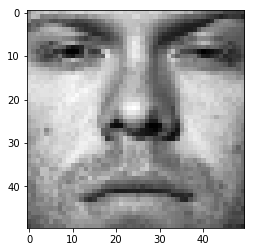

In [4]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print (train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

### Load testing data set

(100, 2500) (100,)


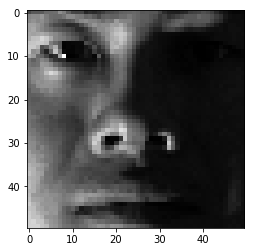

In [5]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print (test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

### Calculate average face

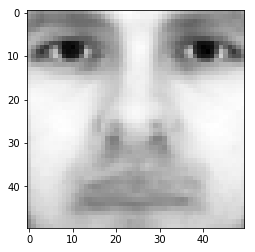

In [6]:
data_size = train_data.shape[0]
pixel_number = train_data.shape[1]
average_face = np.zeros(pixel_number)

for data in train_data:
    for i in range(pixel_number):
        average_face[i] += data[i]

for i in range(pixel_number):
        average_face[i] = average_face[i]/data_size

plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

### Mean subtraction


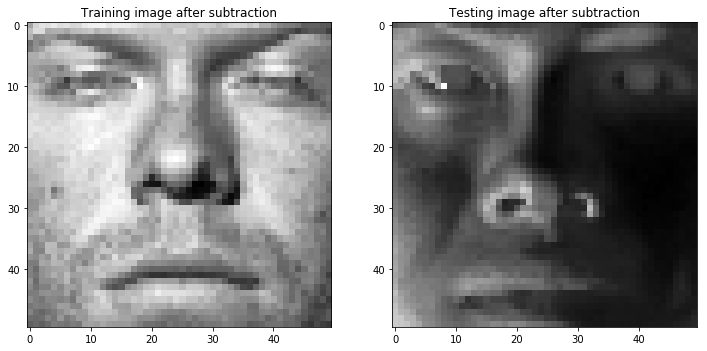

In [7]:
# subtraction
for i in range(train_data.shape[0]):
    for j in range(pixel_number):
        train_data[i][j] -= average_face[j]
        
for i in range(test_data.shape[0]):
    for j in range(pixel_number):
        test_data[i][j] -= average_face[j]
        
sample_train_image = train_data[10, :]
sample_test_image = test_data[10, :]     

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
plt.title("Training image after subtraction")
plt.imshow(sample_train_image.reshape(50,50), cmap = cm.Greys_r)

plt.subplot(1, 2, 2)
plt.title("Testing image after subtraction")
plt.imshow(sample_test_image.reshape(50,50), cmap = cm.Greys_r)

In [8]:
mean_sub = []
mean_sub = np.array(row - average_face for row in train_data)

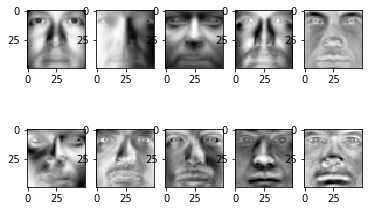

In [9]:
# Perform Singular Value Decomposition
u, d, v = np.linalg.svd(train_data)
# print first 10 eigenfaces
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(v[i, :].reshape(50, 50), cmap=cm.Greys_r)

### Eigenface

In [10]:
u, d, v = np.linalg.svd(train_data)

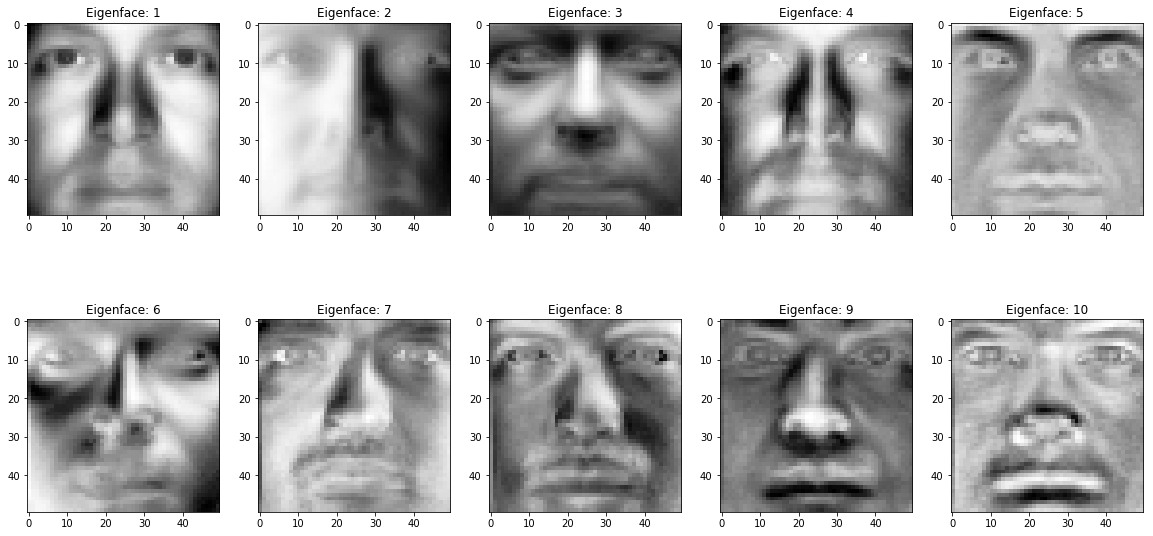

In [13]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(v[i].reshape(50,50), cmap = cm.Greys_r)
    plt.title("Eigenface: " + str(i+1))

### Low-rank approximation

In [88]:
def get_approximation_error(s, U, V, r, a):
    S = np.diag(s)
    approximation = np.dot(np.dot(U[:,:r], S[:r,:r]), V[:r,:])
    return LA.norm(a - approximation)

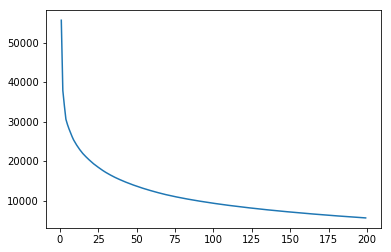

In [91]:
x = np.arange(1,200)
y = [0] * len(x)

for i in x:
    y[i-1] = get_approximation_error(s, U, V, i, train_data)
plt.plot(x, y)

### Eigenface Feature

In [14]:
def getFeatureMatrix(V, Z, r):
    return np.dot(Z, V[:r, :].T)

### Face recognition

In [20]:
def getFeatureSets(r):
    return getFeatureMatrix(v, train_data, r), getFeatureMatrix(v, test_data, r)

In [21]:
def evaluate_logistic(X_train, X_test, y_train, y_test):
    model = LogisticRegression(multi_class='ovr')
    model = model.fit(X_train, y_train)

    # check the accuracy on the training set
    score = model.score(X_test, y_test)
    return score

In [22]:
r_set = np.arange(1,200)
accuracy_array = [0] * len(r_set)

In [23]:
for r in r_set:
    train_feature_set, test_feature_set = getFeatureSets(r)
    accuracy_array[r-1] = evaluate_logistic(train_feature_set, test_feature_set, train_labels, test_labels)

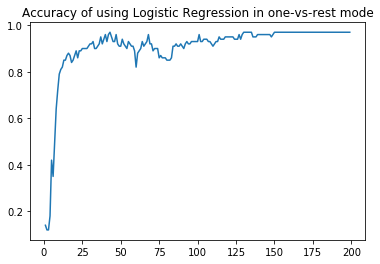

In [24]:
plt.plot(r_set, accuracy_array)
plt.title("Accuracy of using Logistic Regression in one-vs-rest mode")

In [44]:
def evaluate_GaussianNB(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model = model.fit(X_train, y_train)

    # check the accuracy on the training set
    score = model.score(X_test, y_test)
    return score

In [45]:
r_set = np.arange(1,200)
accuracy_array = [0] * len(r_set)

In [46]:
for r in r_set:
    train_feature_set, test_feature_set = getFeatureSets(r)
    accuracy_array[r-1] = evaluate_GaussianNB(train_feature_set, test_feature_set, train_labels, test_labels)

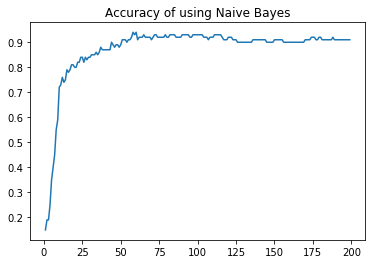

In [47]:
plt.plot(r_set, accuracy_array)
plt.title("Accuracy of using Naive Bayes")

## Question 2